<a href="https://colab.research.google.com/github/mherbert93/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



# Part 1

In [0]:
def breathalyzer_accuracy(prob_drunk_prior, false_positive_rate, desired_probability=0.95): #default desired probability of 95%
  posterior_probability1 = 0
  iteration = 0
  while posterior_probability1 < desired_probability:
    iteration += 1 #keeps track of how many iterations have been done.
    p_pos_user = 1 #our test does not produce false negatives

    if iteration == 1:
      p_user = prob_drunk_prior #on first iteration, use our prior drunk dirivng population.
    else:
      p_user = posterior_probability1 #on subsequent iterations, we use the posterior probability.

    p_pos_nonuser = false_positive_rate
    p_nonuser = 1-p_user

    numerator = (p_pos_user*p_user)
    denominator = (p_pos_user*p_user) + (p_pos_nonuser*p_nonuser)

    posterior_probability1 = numerator / denominator
  print("Probability of " + str(posterior_probability1) + " took " + str(iteration) + " iterations.")

In [0]:
breathalyzer_accuracy(0.001, 0.08, 0.95)

Probability of 0.9606895076105054 took 4 iterations.


Important to note regarding Breathalyzer prior population. While in this case the prior population is 1/1000, in the real world, there would be other mitigating factors that would more strongly indicate the person is intoxicated. For example, a Breathalyzer that comes back positive, combined with other indicating variables(cannot walk a straight line, slurred speech, etc), when weighted against the prior population, would result in a much higher percentage on the first iteration.

These could even be variables that could be weighted to create an adjusted prior population. For example, say if 4/5 people who could not pass the line test were drunk, our prior population would need to be weighted to account for this.

# Part 2

In [0]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])

df = df.replace({'y' : 1, 'n' : 0, '?' : np.NaN})

rep = df[df['party']=='republican']
dem = df[df['party']=='democrat']

In [0]:
def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = data.dropna() #do not include nulls
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  # pass extra parameter (ddof=1) to calculate **sample** standard deviation
  s = data.std(ddof=1)
  stderr = s / np.sqrt(n)
  # Lookup the t-statistic that corresponds to 95% area under the curve
  # for my given degrees of freedom: 49
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  margin_of_error = t*stderr
  return (mean, mean - margin_of_error, mean + margin_of_error)

In [0]:
from scipy import stats
#rep = rep.dropna() #drop rows that contain null values
rep_mean, rep_lower, rep_upper = confidence_interval(rep['right-to-sue'])

In [0]:
print(rep_mean) #mean
print(rep_lower) #upper confidence interval
print(rep_upper) #lower confidence interval

0.8607594936708861
0.8061858971620528
0.9153330901797194


In [0]:
## bayesian confidence level
def bayes_remove_null(df_col, confidence_percent):
  df_col = df_col.dropna() #do not include nulls
  return stats.bayes_mvs(df_col, alpha=.95)

mean_CI, _, _ = bayes_remove_null(rep['right-to-sue'], .95)
mean_CI

Mean(statistic=0.8607594936708861, minmax=(0.8061858971620528, 0.9153330901797194))

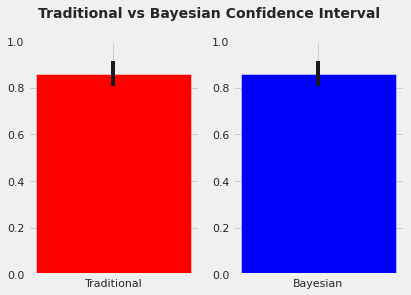

In [0]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2)

#plt.bar(x=0, height=rep_mean, yerr=rep_mean-rep_lower, color='red')
#plt.bar(x=1, height=mean_CI.statistic, yerr=mean_CI.statistic-mean_CI.minmax[0] , color='blue')

ax1.bar(x=0, height=rep_mean, yerr=rep_mean-rep_lower, color='red')
ax2.bar(x=1, height=mean_CI.statistic, yerr=mean_CI.statistic-mean_CI.minmax[0] , color='blue')

ax1.set_xticks([0])
ax2.set_xticks([1])

ax1.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax2.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])            

ax1.set_xticklabels(['Traditional'])
ax2.set_xticklabels(['Bayesian'])

fig.suptitle('Traditional vs Bayesian Confidence Interval', y=1, weight='bold', fontsize=14)


plt.show()

In [0]:
rep.shape

(168, 17)

As we can see, the result is identical using either approach. The dataset contains 168 rows, so this is enough data that the result is the same either way. With a smaller amount of data, there would probably be slightly different results.

# Part 3

I believe one of the main differences between the Bayesian approach and the frequentist approach is the use of prior knowledge. In the Bayesian approach you also change that prior knowledge based on changing values. For example, the first time you run a test, you use what existing prior knowledge you know. But after running the test, you would update that parameter with the newly calculated probability. You would not do this with the frequentist approach.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!